In [87]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [88]:
arr_data = np.genfromtxt("../datasets/apple_quality.csv", delimiter=",")
arr_label = np.genfromtxt("../datasets/apple_quality.csv", delimiter=",", dtype=str)


['Size' 'Weight' 'Sweetness' 'Crunchiness' 'Juiciness' 'Ripeness'
 'Acidity']


In [89]:
labels = np.delete(arr_label[0], [0,-1], 0)

# Eliminamos la primera fila y la ultima, que contiene los nombres de las columnas y el nombre del autor
arr_data = np.delete(arr_data, [0,-1], 0)

# Eliminamos la primera columna que contiene el id
X = np.delete(arr_data, [0,-1], 1)

y = np.array([]).astype(int)
for label in arr_label[1:-1,-1]:
    if label == "bad":
        y = np.append(y, 0)
    else:
        y = np.append(y, 1)


In [90]:
from sklearn.model_selection import train_test_split

print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

[[-3.97004852 -2.51233638  5.34632961 ...  1.84490036  0.3298398
  -0.49159048]
 [-1.19521719 -2.83925653  3.66405876 ...  0.8532858   0.86753008
  -0.72280937]
 [-0.29202386 -1.35128199 -1.73842916 ...  2.83863551 -0.03803333
   2.62163647]
 ...
 [-2.6345153  -2.13824672 -2.44046129 ...  2.19970859  4.76385918
  -1.33461139]
 [-4.00800374 -1.77933711  2.36639697 ...  2.16143512  0.21448838
  -2.22971981]
 [ 0.27853965 -1.71550503  0.12121725 ...  1.2666774  -0.77657147
   1.59979646]]


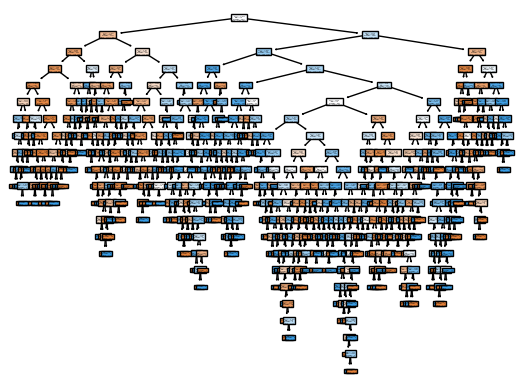

Accuracy:  0.795


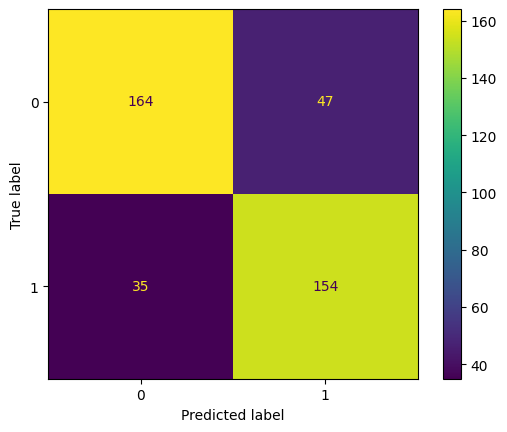

In [91]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)
tree.plot_tree(classifier, filled=True)
plt.show()
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
plt.show()

In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
feature_selector = SelectKBest(k=3)

X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

classifier = RandomForestClassifier()
classifier.fit(X_train_selected, y_train)
y_pred = classifier.predict(X_test_selected)
print("Accuracy: ", accuracy_score(y_test, y_pred))

print(labels)
selected_feature_mask = feature_selector.get_support()
selected_feature_names = np.array(labels)[selected_feature_mask]
print(selected_feature_names)

Accuracy:  0.71
['Size' 'Weight' 'Sweetness' 'Crunchiness' 'Juiciness' 'Ripeness'
 'Acidity']
['Sweetness' 'Juiciness' 'Ripeness']


/usr/local/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When 

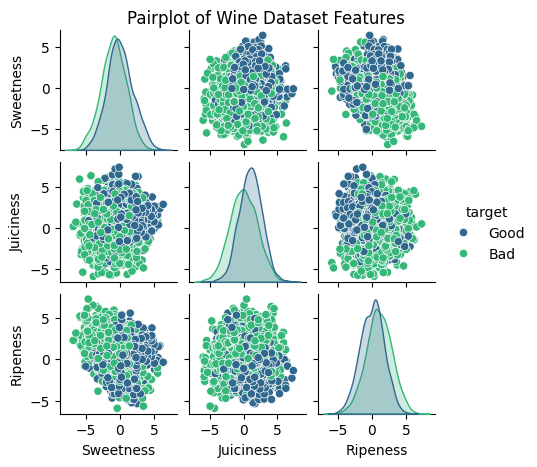

In [96]:
import seaborn as sns
import pandas as pd

apple_df = pd.DataFrame(data=X, columns=labels)
apple_df['target'] = ['Bad' if x == 0 else 'Good' for x in y]

sns.pairplot(apple_df, hue='target',
             palette='viridis',
             diag_kind='kde',
             x_vars=selected_feature_names,
             y_vars=selected_feature_names,
             height=1.5
             )
plt.suptitle('Pairplot of Wine Dataset Features', y=1.02)
plt.show()